In [1]:
import sys
sys.executable

'/Users/titiksha/dev/cla_christmas_break/.venv/bin/python'

In [3]:
import yfinance as yf

In [4]:
# download historical stock data 
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.347170,24.817055,23.906234,24.805920,212818400
2015-01-05,23.661270,24.195737,23.474208,24.115567,257142000
2015-01-06,23.663500,23.924052,23.300507,23.725854,263188400
2015-01-07,23.995312,24.095523,23.761482,23.872829,160423600
2015-01-08,24.917271,24.975172,24.206875,24.324905,237458000


In [6]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500


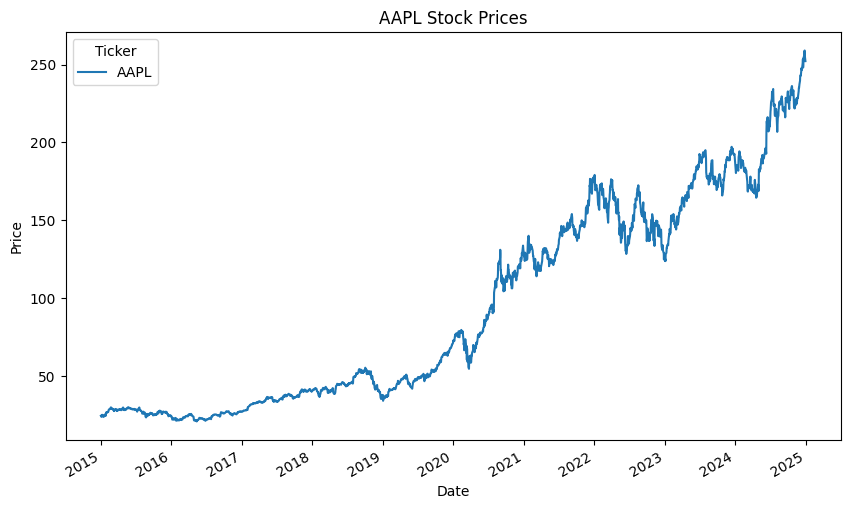

In [7]:
import matplotlib.pyplot as plt

#plot closing price
data['Close'].plot(figsize=(10,6),title=f"{ticker} Stock Prices", xlabel="Date", ylabel="Price")
plt.show()

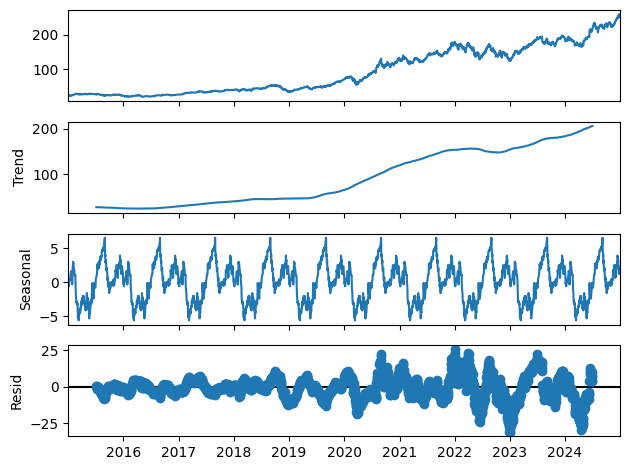

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)
decomposition.plot()
plt.show()

In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

#Data Preparation
data['Close'] = data['Close'].dropna()
train = data['Close'][:-30]
test = data['Close'][-30:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()


print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2485
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5148.449
Date:                Thu, 02 Jan 2025   AIC                          10308.899
Time:                        15:47:53   BIC                          10343.805
Sample:                             0   HQIC                         10321.575
                               - 2485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0143      0.013     -1.126      0.260      -0.039       0.011
ar.L2         -0.0249      0.014     -1.808      0.071      -0.052       0.002
ar.L3         -0.0275      0.014     -1.912      0.0

/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
forecast = model_fit.forecast(steps=30)

/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


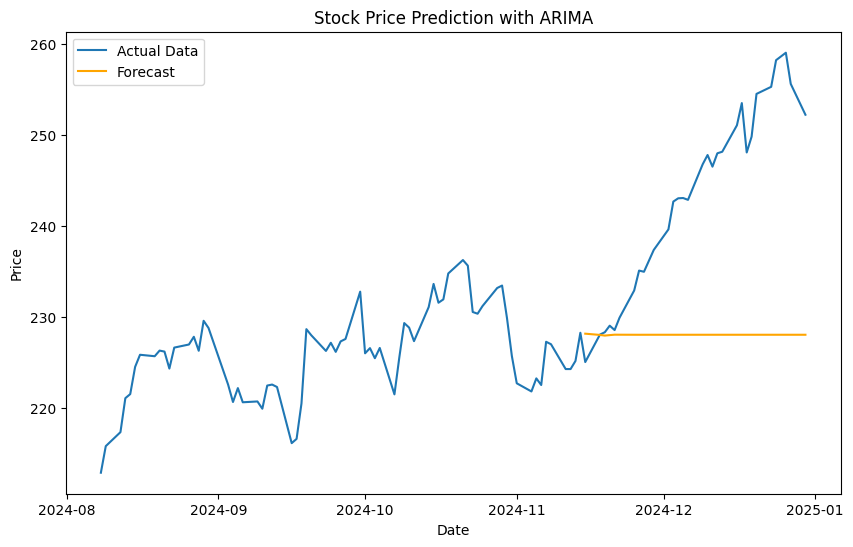

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-100:], data['Close'][-100:], label="Actual Data")
plt.plot(test.index, forecast, label="Forecast", color='orange')
plt.title("Stock Price Prediction with ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Preprocess data
prices = data['Close'].values.reshape(-1, 1)
scaled_prices = (prices - prices.mean()) / prices.std()

# Prepare training data
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i-window_size:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)

# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2666
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0135
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0099
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0102
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0090
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0086
Epoch 16/20
77/

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Generate forecast_dates
last_date = data.index[-1]  # Get the last date from the dataset
forecast_dates = pd.date_range(start=last_date, periods=30 + 1, freq='B')[1:]  # Next 30 business days

# Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast'))
fig.update_layout(title="Stock Price Forecast", xaxis_title="Date", yaxis_title="Price")
fig.show()


In [18]:
from apscheduler.schedulers.background import BackgroundScheduler

def fetch_realtime_data():
    latest_data = yf.download(ticker, period="1d", interval="1m")
    # Update your database or dashboard with new data

scheduler = BackgroundScheduler()
scheduler.add_job(fetch_realtime_data, 'interval', minutes=1)
scheduler.start()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [19]:
import streamlit as st

st.title("Stock Market Analysis and Forecasting")
ticker_input = st.text_input("Enter Stock Ticker", "AAPL")

if ticker_input:
    stock_data = yf.download(ticker_input, start="2015-01-01")
    st.line_chart(stock_data['Close'])


2025-01-02 15:58:55.758 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:58:55.821 
  command:

    streamlit run /Users/titiksha/dev/cla_christmas_break/.venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-01-02 15:58:55.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:58:55.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:58:55.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:58:55.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:58:55.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 15:5